# Concessão de Crédito - Estudo de Caso - Neurotech

# Entendimento da base e análise exploratória dos dados

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
train = pd.read_csv('train.gz', compression='gzip')
test = pd.read_csv('test.gz', compression='gzip')
print("Formato dataset: ", train.shape)
print(train.info())
train.head(5)

Formato dataset:  (120750, 151)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120750 entries, 0 to 120749
Columns: 151 entries, REF_DATE to ID
dtypes: float64(34), int64(3), object(114)
memory usage: 139.1+ MB
None


,REF_DATE,TARGET,VAR2,IDADE,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,...,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,ID
0,2017-06-01 00:00:00+00:00,0,M,34.137,NaN,RO,-8.808779,-63.878470,D,E,...,2680.289259,D,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,181755
1,2017-08-18 00:00:00+00:00,0,M,40.447,NaN,PB,-7.146537,-34.926080,E,E,...,1777.725469,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,287633
2,2017-06-30 00:00:00+00:00,0,F,33.515,NaN,RS,-27.900178,-53.314035,NaN,E,...,1695.494979,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,88015
3,2017-08-05 00:00:00+00:00,1,F,25.797,NaN,BA,-12.948874,-38.451863,E,E,...,1399.037809,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,122576
4,2017-07-29 00:00:00+00:00,0,F,54.074,NaN,RS,-30.051810,-51.213277,B,E,...,7868.793296,C,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE,2.6.1,1272


Conferindo se as variáveis de treino e teste são as mesmas

In [71]:
set(train.columns).symmetric_difference(set(test.columns))

set()

In [72]:
set(train.columns) == (set(test.columns))

True

In [73]:
set(train['ID']).intersection(set(test['ID']))

set()

Vou juntar os dados de treino e teste para fazer o pre-processamento das variáveis de forma consistente, enquanto guardo os IDs de cada para uso futuro.

In [74]:
test_ids = test['ID'].to_list()

In [75]:
data = pd.concat([train, test], axis=0)
data.head()

,REF_DATE,TARGET,VAR2,IDADE,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,...,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,ID
0,2017-06-01 00:00:00+00:00,0,M,34.137,NaN,RO,-8.808779,-63.878470,D,E,...,2680.289259,D,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,181755
1,2017-08-18 00:00:00+00:00,0,M,40.447,NaN,PB,-7.146537,-34.926080,E,E,...,1777.725469,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,287633
2,2017-06-30 00:00:00+00:00,0,F,33.515,NaN,RS,-27.900178,-53.314035,NaN,E,...,1695.494979,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,88015
3,2017-08-05 00:00:00+00:00,1,F,25.797,NaN,BA,-12.948874,-38.451863,E,E,...,1399.037809,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,122576
4,2017-07-29 00:00:00+00:00,0,F,54.074,NaN,RS,-30.051810,-51.213277,B,E,...,7868.793296,C,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE,2.6.1,1272


Algumas colunas parecem apresentar muitos valores NaN. Vamos analisar a porcentagem de valores NaN em cada coluna.

In [76]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
VAR146,172254,0.998568
VAR4,172212,0.998325
VAR46,172084,0.997583
VAR45,172084,0.997583
VAR44,171926,0.996667
VAR43,171926,0.996667
VAR145,171559,0.994539
VAR38,171404,0.993641
VAR26,171093,0.991838
VAR27,171049,0.991583


Vamos excluir as colunas que apresentarem mais de 20% de valores NaN. 

In [77]:
columns_drop = missing_data.index[missing_data['Percent']>=0.21]
data.drop(columns=columns_drop, inplace=True)

print("Formato do dataset de treino após eliminar colunas: ", data.shape)
data = data.dropna()
print("Formato do dataset de treino  após eliminar entradas com NaN: ", data.shape)

Formato do dataset de treino após eliminar colunas:  (172501, 113)
Formato do dataset de treino  após eliminar entradas com NaN:  (129606, 113)


Checando por entradas duplicadas

In [78]:
duplicadas = data.duplicated()
duplicadas.unique()

array([False])

E por dados ambíguos ou que não contêm a variável target definida

In [79]:
data['TARGET'].unique()

array([0, 1], dtype=int64)

In [80]:
data_noisy = data.drop(columns=['ID', 'REF_DATE'])
data['unique_target'] = data.groupby(data_noisy.columns.to_list())['TARGET'].transform('nunique')
print(data['unique_target'].unique())
noisy_data = data[data['unique_target'] > 1].drop('unique_target', axis=1)
print(data.shape)
data = data.drop(columns=['unique_target'])

[1]
(129606, 114)


Balanceamento da váriavel 'TARGET'

In [81]:
bad = data['TARGET'].value_counts()[0]
good = data['TARGET'].value_counts()[1]
total = data['TARGET'].value_counts().sum() 
percent_good = (good/total)*100
percent_bad = (bad/total)*100

print('% Bons Pagadores: ', round(percent_good, 2),'%')
print('% Maus Pagadores: ', round(percent_bad, 2),'%')


% Bons Pagadores:  22.49 %
% Maus Pagadores:  77.51 %


In [82]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(x=[0, 1], y=[percent_bad, percent_good],
            showlegend=False,
            marker=dict(color='rgba(155, 190, 250, 0.7)')
            ))
fig.add_annotation(
    text='Dados de treino',
    xref='paper', yref='paper',
    x=-0.23, y=1.1,  
    showarrow=False,
    font=dict(size=12, color='rgba(100, 159, 237, 1)'))

# Update layout
fig.update_layout(title_text='% DE PAGADORES',
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  yaxis_ticksuffix="%",
                  coloraxis_colorbar_ticksuffix="m",
                  yaxis_showticksuffix="all"
                  )
fig.update_yaxes(ticks="outside", tickwidth=1, tickcolor='rgba(169, 169, 169, 1)', ticklen=10)
fig.update_yaxes(showline=True, linewidth=1, linecolor='rgba(169, 169, 169, 1)')
fig.update_layout(xaxis=dict(tickvals=[0, 1], ticktext=['Maus', 'Bons'])
                  )
fig.layout.update({'width' : 400, 'height': 500})

fig.show()


Parece que temos um desbalanço de classe que deverá ser tratado quando formos treinar do nosso modelo.

Tipos de variáveis no dataset de treino

In [83]:
data.dtypes.value_counts()

object     100
float64     10
int64        3
Name: count, dtype: int64

Temos 100 variáveis com entradas do tipo object, e apenas 12 variáveis de tipo numérico. Para fins de uma primeira análise vou separar em dois dataframes as variáveis numéricas e as variáveis não numéricas.

In [84]:
columns = data.dtypes != 'object'
columns_to_keep = data.columns[columns]
data_num = data[columns_to_keep]
data_num.head()

,TARGET,IDADE,VAR6,VAR7,VAR24,VAR39,VAR40,VAR41,VAR42,VAR47,VAR141,VAR147,ID
0,0,34.137,-8.808779,-63.878470,0.034,0.512334,0.486768,0.357526,0.538737,0.046,2680.289259,102,181755
1,0,40.447,-7.146537,-34.926080,0.017,0.328021,0.447454,0.414335,0.485512,0.099,1777.725469,102,287633
2,0,33.515,-27.900178,-53.314035,0.000,0.627262,0.730539,0.916771,0.519726,1.000,1695.494979,102,88015
3,1,25.797,-12.948874,-38.451863,0.000,0.338643,0.405233,0.408007,0.567710,0.000,1399.037809,102,122576
4,0,54.074,-30.051810,-51.213277,0.000,0.626047,0.770664,0.907036,0.538496,0.017,7868.793296,102,1272


In [85]:
data_cat = data.drop(columns_to_keep, axis=1)
data_cat.head(3)

,REF_DATE,VAR2,VAR5,VAR9,VAR10,VAR49,VAR50,VAR51,VAR52,VAR53,...,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR142,VAR148,VAR149
0,2017-06-01 00:00:00+00:00,M,RO,E,BAIXA,S,N,N,N,N,...,LONGE,MEDIO,MUITO LONGE,LONGE,LONGE,MEDIO,LONGE,D,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1
1,2017-08-18 00:00:00+00:00,M,PB,E,MEDIA,S,N,N,N,N,...,MEDIO,PROXIMO,PROXIMO,LONGE,LONGE,LONGE,MUITO LONGE,E,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1
2,2017-06-30 00:00:00+00:00,F,RS,E,ALTISSIMA,S,N,N,N,N,...,LONGE,MUITO LONGE,LONGE,LONGE,MUITO LONGE,LONGE,MUITO PROXIMO,E,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1


## Tratamento das variáveis categoricas

As colunas REF_DATE, VAR48 e VAR49 não parecem adicionar informação no nosso modelo 

In [86]:
data_cat['VAR148'].value_counts()

VAR148
EMAIL INEXISTENTE                                         67539
EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INEXISTENTE    48885
OPERACAO REALIZADA COM SUCESSO                            13182
Name: count, dtype: int64

In [87]:
data_cat['VAR149'].value_counts()

VAR149
2.6.1    129606
Name: count, dtype: int64

In [88]:
data_cat = data_cat.drop(columns=['REF_DATE', 'VAR148', 'VAR149'])

In [89]:
data_cat.head(5)

,VAR2,VAR5,VAR9,VAR10,VAR49,VAR50,VAR51,VAR52,VAR53,VAR54,...,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR142
0,M,RO,E,BAIXA,S,N,N,N,N,N,...,LONGE,MUITO LONGE,LONGE,MEDIO,MUITO LONGE,LONGE,LONGE,MEDIO,LONGE,D
1,M,PB,E,MEDIA,S,N,N,N,N,N,...,MEDIO,LONGE,MEDIO,PROXIMO,PROXIMO,LONGE,LONGE,LONGE,MUITO LONGE,E
2,F,RS,E,ALTISSIMA,S,N,N,N,N,N,...,MUITO LONGE,MUITO LONGE,LONGE,MUITO LONGE,LONGE,LONGE,MUITO LONGE,LONGE,MUITO PROXIMO,E
3,F,BA,E,MEDIA,S,S,N,N,N,N,...,LONGE,LONGE,MEDIO,MEDIO,PROXIMO,MEDIO,LONGE,MEDIO,MEDIO,E
4,F,RS,E,MEDIA,S,S,N,N,N,N,...,MEDIO,PROXIMO,PROXIMO,MUITO PROXIMO,MEDIO,PROXIMO,MUITO PROXIMO,PROXIMO,MUITO PROXIMO,C


### Enconding Categorical Features
Nesta sessão vamos: 
1) Determinar quais são as categorias existentes em todo o dataset 2) Determinar quais colunas apresentam quais categorias e se são ordinais ou nominais.

Quais são as escalas existentes?

In [90]:
# get the unique categories for each column
# leave out the state feature
unique_categories = {column: sorted(data_cat[column].unique()) for column in data_cat.drop(columns=['VAR5']).columns}
unique_cats = set(tuple(x) for x in unique_categories.values())
unique_cats

{('A', 'B', 'C', 'D', 'E'),
 ('ALTA', 'ALTISSIMA', 'BAIXA', 'BAIXISSIMA', 'MEDIA'),
 ('ALTA', 'ALTISSIMA', 'BAIXISSIMA'),
 ('ALTA', 'ALTISSIMA', 'BAIXISSIMA', 'MEDIA'),
 ('ALTISSIMA', 'BAIXISSIMA'),
 ('F', 'M'),
 ('LONGE', 'MEDIO', 'MUITO LONGE', 'MUITO PROXIMO', 'PROXIMO'),
 ('LONGE', 'MEDIO', 'MUITO LONGE', 'PROXIMO'),
 ('MUITO LONGE', 'PROXIMO'),
 ('N', 'S')}

Normalizando respectivamente todas as variáveis com entradas de distância e frequência para:

('LONGE', 'MEDIO', 'MUITO LONGE', 'MUITO PROXIMO', 'PROXIMO')

('ALTA', 'ALTISSIMA', 'BAIXA', 'BAIXISSIMA', 'MEDIA')

In [91]:
categoriais_ordinais = [('A', 'B', 'C', 'D', 'E'), ('ALTA', 'ALTISSIMA', 'BAIXA', 'BAIXISSIMA', 'MEDIA'), 
                    ('LONGE', 'MEDIO', 'MUITO LONGE', 'MUITO PROXIMO', 'PROXIMO')]
categorias_nominais = [('N', 'S'),('F', 'M')]
ordinal_columns = []
ordinal_columns0 = []
ordinal_columns1 = []
ordinal_columns2 = []
nominal_columns = []

for col in data_cat.drop(columns=['VAR5']):
    if  any(set(tuple(unique_categories[col])).issubset(x) for x in categoriais_ordinais):
        ordinal_columns.append(col)
    if set(tuple(unique_categories[col])).issubset(categoriais_ordinais[0]):
        ordinal_columns0.append(col)
    elif set(tuple(unique_categories[col])).issubset(categoriais_ordinais[1]):
        ordinal_columns1.append(col)
    elif set(tuple(unique_categories[col])).issubset(categoriais_ordinais[2]):
        ordinal_columns2.append(col)
    elif any(set(tuple(unique_categories[col])).issubset(x) for x in categorias_nominais):
        nominal_columns.append(col)

In [92]:
ordinal_columns0

['VAR9', 'VAR142']

### Encoding Ordinal Features

Vou usar a função OrdinalEnconder() do sklearn para codificar numericamente as categorias que apresentam uma hierarquia.

In [93]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder().set_output(transform="pandas")
encoded = encoder.fit_transform(data_cat[ordinal_columns0])
encoded

,VAR9,VAR142
0,4.0,3.0
1,4.0,4.0
2,4.0,4.0
3,4.0,4.0
4,4.0,2.0
...,...,...
51743,4.0,4.0
51744,4.0,4.0
51747,4.0,4.0
51748,4.0,3.0


In [94]:
encoder1 = OrdinalEncoder(categories=[['BAIXISSIMA', 'BAIXA', 'MEDIA', 'ALTA', 'ALTISSIMA']]*len(ordinal_columns1)).set_output(transform="pandas")
encoded1 = encoder1.fit_transform(data_cat[ordinal_columns1])
encoded1

,VAR10,VAR66,VAR67,VAR68,VAR69,VAR70,VAR71,VAR72,VAR73,VAR74,...,VAR92,VAR93,VAR94,VAR95,VAR96,VAR97,VAR98,VAR99,VAR100,VAR101
0,1.0,2.0,0.0,3.0,0.0,3.0,4.0,0.0,0.0,3.0,...,2.0,0.0,3.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0
1,2.0,3.0,4.0,3.0,0.0,3.0,4.0,3.0,2.0,3.0,...,2.0,3.0,4.0,3.0,4.0,3.0,3.0,4.0,4.0,2.0
2,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,...,4.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0
4,2.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51743,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51744,2.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0,4.0,4.0,...,4.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0
51747,4.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0
51748,1.0,3.0,3.0,3.0,2.0,3.0,4.0,0.0,3.0,2.0,...,3.0,0.0,3.0,3.0,3.0,4.0,2.0,4.0,0.0,4.0


In [95]:
encoder2 = OrdinalEncoder(categories=[('MUITO LONGE','LONGE', 'MEDIO', 'PROXIMO', 'MUITO PROXIMO')]*len(ordinal_columns2)).set_output(transform="pandas")
encoded2 = encoder2.fit_transform(data_cat[ordinal_columns2])
encoded2

,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,...,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140
0,1.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,...,2.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0
1,2.0,1.0,2.0,0.0,3.0,2.0,3.0,2.0,2.0,2.0,...,2.0,2.0,1.0,2.0,3.0,3.0,1.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,4.0
3,3.0,2.0,2.0,4.0,3.0,2.0,3.0,1.0,1.0,2.0,...,2.0,1.0,1.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0
4,3.0,3.0,3.0,3.0,3.0,1.0,2.0,4.0,2.0,3.0,...,3.0,2.0,3.0,3.0,4.0,2.0,3.0,4.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51743,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51744,2.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,3.0,2.0,...,3.0,3.0,1.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0
51747,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,4.0
51748,2.0,3.0,3.0,4.0,3.0,2.0,3.0,0.0,3.0,3.0,...,2.0,3.0,3.0,4.0,3.0,1.0,3.0,3.0,3.0,1.0


### Encoding Nominal Features

Para as escalas que não apresentam ordem vamos usar binary enconding. Como temos apenas duas variáveis, podemos usar também o OrdinalEncoder do sklearn para dar valores numéricos 0 ou 1 para as variáveis categóricas binárias.

In [96]:
encoder = OrdinalEncoder().set_output(transform="pandas")
nominal_encoded = encoder.fit_transform(data_cat[nominal_columns])
nominal_encoded

,VAR2,VAR49,VAR50,VAR51,VAR52,VAR53,VAR54,VAR55,VAR56,VAR57,VAR58,VAR59,VAR60,VAR61,VAR62,VAR63,VAR64,VAR65
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51743,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51744,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51747,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51748,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Juntando todos os encodings em um só dataframe

In [97]:
data_cat_encoded = pd.concat([nominal_encoded, encoded, encoded1, encoded2], axis=1)
data_cat_encoded

,VAR2,VAR49,VAR50,VAR51,VAR52,VAR53,VAR54,VAR55,VAR56,VAR57,...,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,2.0,3.0,3.0,1.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,4.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,1.0,1.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,3.0,3.0,4.0,2.0,3.0,4.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51743,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51744,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,1.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0
51747,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,4.0
51748,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,3.0,4.0,3.0,1.0,3.0,3.0,3.0,1.0


### One-Hot-Encoding

Vou encodificar também com o OHE para ver se obtenho um resultado melhor de treinamento do modelo, em comparação com o Ordinal Encoding.

In [98]:
# One-hot encoding of categorical variables
#data = pd.get_dummies(data)
#test = pd.get_dummies(test)

#print('Training Features shape: ', data.shape)

Testing Features shape:  (51751, 151)


## Correlações

### Variáveis Numéricas

In [99]:
data_num.corr()

,TARGET,IDADE,VAR6,VAR7,VAR24,VAR39,VAR40,VAR41,VAR42,VAR47,VAR141,VAR147,ID
TARGET,1.000000,-0.098568,0.017507,0.034826,-0.024364,-0.058798,-0.038920,-0.053930,-0.013374,0.004395,0.006754,0.015895,0.000739
IDADE,-0.098568,1.000000,-0.012278,0.031010,0.002860,0.470114,0.015892,0.002929,0.153030,0.073592,0.185581,-0.042455,-0.001695
VAR6,0.017507,-0.012278,1.000000,0.189845,-0.181373,0.105403,-0.155224,0.025992,0.004898,-0.017335,-0.061704,0.069837,0.003306
VAR7,0.034826,0.031010,0.189845,1.000000,-0.021432,0.012591,0.052466,0.069707,0.043689,0.061716,-0.054695,0.062443,-0.000656
VAR24,-0.024364,0.002860,-0.181373,-0.021432,1.000000,-0.262880,0.044594,0.059047,-0.017666,0.002013,0.099251,-0.210676,0.000951
VAR39,-0.058798,0.470114,0.105403,0.012591,-0.262880,1.000000,0.112525,0.145933,0.112568,0.029801,0.230535,0.005826,-0.001746
VAR40,-0.038920,0.015892,-0.155224,0.052466,0.044594,0.112525,1.000000,0.630643,0.039264,0.006799,0.033903,0.038995,-0.001221
VAR41,-0.053930,0.002929,0.025992,0.069707,0.059047,0.145933,0.630643,1.000000,0.040273,0.011000,-0.012001,0.081656,-0.000134
VAR42,-0.013374,0.153030,0.004898,0.043689,-0.017666,0.112568,0.039264,0.040273,1.000000,0.377921,0.046831,0.015636,0.000233
VAR47,0.004395,0.073592,-0.017335,0.061716,0.002013,0.029801,0.006799,0.011000,0.377921,1.000000,0.016983,0.031881,-0.002551


In [100]:
correlations = data_num.corr()['TARGET'].sort_values()

print('Correlações mais positivas:\n', correlations.tail(5))
print('\nCorrelações mais negativas:\n', correlations.head(5))

Correlações mais positivas:
 VAR141    0.006754
VAR147    0.015895
VAR6      0.017507
VAR7      0.034826
TARGET    1.000000
Name: TARGET, dtype: float64

Correlações mais negativas:
 IDADE   -0.098568
VAR39   -0.058798
VAR41   -0.053930
VAR40   -0.038920
VAR24   -0.024364
Name: TARGET, dtype: float64


In [101]:
data_num.describe()

,TARGET,IDADE,VAR6,VAR7,VAR24,VAR39,VAR40,VAR41,VAR42,VAR47,VAR141,VAR147,ID
count,129606.000000,129606.000000,129606.000000,129606.000000,129606.000000,129606.000000,129606.000000,129606.000000,129606.000000,129606.000000,129606.000000,129606.000000,129606.000000
mean,0.224928,44.430767,-15.120299,-46.094847,0.080754,0.473181,0.529940,0.623651,0.506274,0.297180,1968.815098,101.796583,165421.250822
std,0.417536,14.461024,9.000404,7.361005,0.139580,0.143302,0.114541,0.218886,0.068691,0.424162,959.271034,0.604531,95533.725966
min,0.000000,18.014000,-33.521563,-72.900276,0.000000,0.049309,0.208688,0.000000,0.006658,0.000000,2.310000,100.000000,2.000000
25%,0.000000,33.112000,-23.097257,-50.046232,0.000000,0.367462,0.447289,0.439852,0.463579,0.001000,1570.658128,102.000000,82827.000000
50%,0.000000,42.496000,-15.843025,-46.706393,0.034000,0.468388,0.508889,0.534669,0.496036,0.010000,1715.997803,102.000000,165338.500000
75%,0.000000,54.710000,-7.032987,-39.307669,0.086000,0.583542,0.582270,0.878433,0.525225,0.830000,1983.503491,102.000000,248509.000000
max,1.000000,105.477000,4.478585,-32.429516,1.000000,0.976928,0.920685,0.982985,0.910865,1.000000,33954.140000,102.000000,330581.000000


<Axes: >

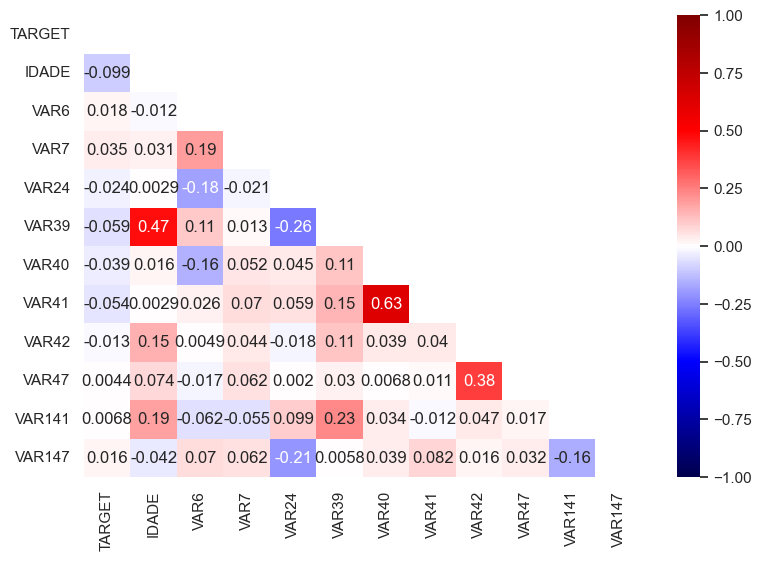

In [102]:
sns.set_theme(style="white")
cmap = 'seismic'
f, ax = plt.subplots(figsize=(9, 6))
mask = np.triu(np.ones_like(data_num.drop(columns=['ID']).corr(), dtype=bool))
vmin = -1
vmax = 1
sns.heatmap(data_num.drop(columns=['ID']).corr(), mask=mask, cmap=cmap, annot=True, vmin=vmin, vmax=vmax)

#### KDE

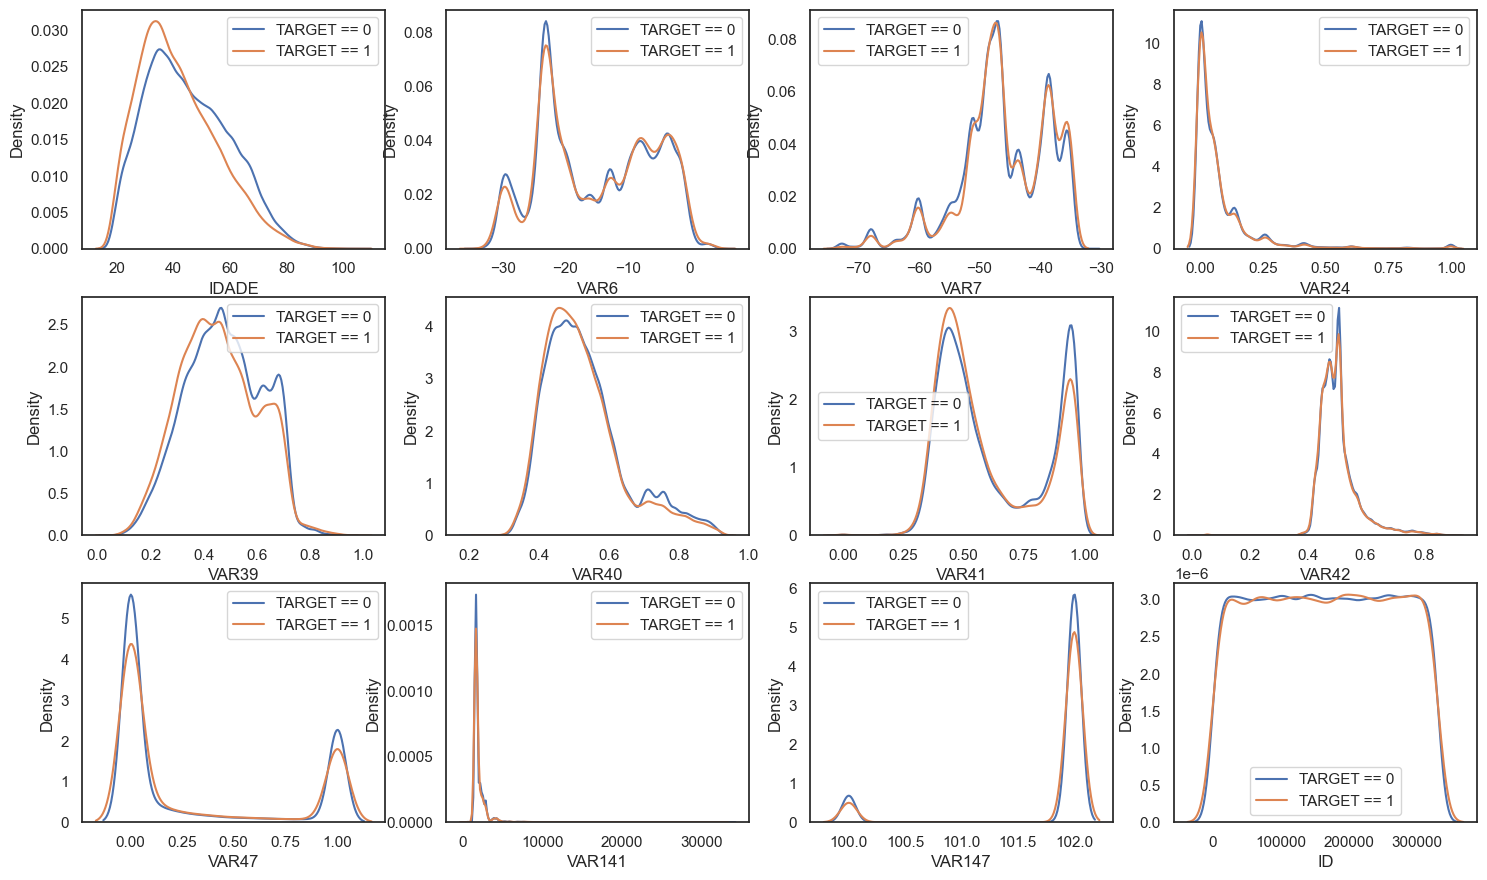

In [103]:
plt.figure(figsize = (18, 18))
data_num_0 = data_num[data_num['TARGET'] == 0].drop(columns=['TARGET'])
data_num_1 = data_num[data_num['TARGET'] == 1].drop(columns=['TARGET'])
for i in range(1, len(columns_to_keep)):
    plt.subplot(5, 4, i)
    sns.kdeplot(data_num_0[columns_to_keep[i]], label = 'TARGET == 0')
    sns.kdeplot(data_num_1[columns_to_keep[i]], label = 'TARGET == 1')
    plt.legend()

#### Gráficos de dispersão

In [104]:
'''
plt.figure(figsize = (18, 18))
data_num_0 = data_num[data_num['TARGET'] == 0].drop(columns=['TARGET'])
data_num_1 = data_num[data_num['TARGET'] == 1].drop(columns=['TARGET'])
for i in range(1, len(columns_to_keep)):
    plt.subplot(5, 4, i)
    sns.scatterplot(data=data_num, x=data_num['TARGET'], y=columns_to_keep[i], color='b')
'''

"\nplt.figure(figsize = (18, 18))\ndata_num_0 = data_num[data_num['TARGET'] == 0].drop(columns=['TARGET'])\ndata_num_1 = data_num[data_num['TARGET'] == 1].drop(columns=['TARGET'])\nfor i in range(1, len(columns_to_keep)):\n    plt.subplot(5, 4, i)\n    sns.scatterplot(data=data_num, x=data_num['TARGET'], y=columns_to_keep[i], color='b')\n"

#### Efeito da idade no pagamento

### Variáveis Categóricas

Correlação das variáveis categóricas

Correlação das variáveis categóricas codificadas

In [105]:
data_cat_encoded['TARGET'] = data['TARGET']

In [106]:
data_cat['TARGET'] = data['TARGET']

In [107]:
data_cat_encoded.corr()

,VAR2,VAR49,VAR50,VAR51,VAR52,VAR53,VAR54,VAR55,VAR56,VAR57,...,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,TARGET
VAR2,1.000000,0.049800,0.044067,0.018029,0.049267,0.143462,0.012988,-0.000619,0.043745,0.008034,...,0.012829,0.008948,0.006218,0.015612,-0.003845,0.006599,0.008689,0.004771,0.000455,0.070531
VAR49,0.049800,1.000000,0.161298,0.046549,0.075586,0.038013,0.046221,0.064793,0.116487,0.035660,...,0.001037,0.014500,0.004299,0.008441,0.016915,0.014770,0.005474,0.007490,0.026866,-0.001142
VAR50,0.044067,0.161298,1.000000,0.201233,0.115554,0.137166,0.020267,0.401699,0.121278,-0.031860,...,-0.023896,-0.008310,-0.026846,-0.020867,0.035998,-0.017548,-0.024281,-0.025517,0.008373,0.001155
VAR51,0.018029,0.046549,0.201233,1.000000,0.097718,0.087428,0.041090,0.106474,0.083839,-0.013111,...,-0.002962,0.011882,-0.004090,-0.004555,0.023165,0.005727,0.000821,-0.001698,0.009342,0.005752
VAR52,0.049267,0.075586,0.115554,0.097718,1.000000,0.045920,0.049120,0.052062,0.100781,0.017979,...,-0.006718,-0.002097,-0.008434,-0.005837,0.011832,-0.006879,-0.009735,-0.008664,0.005707,-0.003020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VAR137,0.006599,0.014770,-0.017548,0.005727,-0.006879,0.004950,0.013512,-0.014980,0.009656,0.027372,...,0.509077,0.521812,0.688864,0.509398,0.362632,1.000000,0.676685,0.697460,0.282292,0.045242
VAR138,0.008689,0.005474,-0.024281,0.000821,-0.009735,0.003091,0.014141,-0.017092,0.009494,0.027860,...,0.428955,0.439608,0.607284,0.444839,0.321808,0.676685,1.000000,0.599304,0.271362,0.045553
VAR139,0.004771,0.007490,-0.025517,-0.001698,-0.008664,0.000668,0.012372,-0.019100,0.004018,0.028174,...,0.558380,0.514286,0.683517,0.544932,0.219416,0.697460,0.599304,1.000000,0.153240,0.040351
VAR140,0.000455,0.026866,0.008373,0.009342,0.005707,0.010430,0.011627,-0.004481,0.012863,0.009124,...,0.050252,0.129946,0.203552,0.042646,0.386422,0.282292,0.271362,0.153240,1.000000,0.010783


In [108]:
correlations = data_cat_encoded.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 VAR70     0.050112
VAR75     0.050180
VAR68     0.051020
VAR82     0.051513
VAR83     0.052473
VAR98     0.052884
VAR74     0.052885
VAR92     0.053122
VAR66     0.055092
VAR118    0.055135
VAR72     0.055516
VAR84     0.055930
VAR89     0.056602
VAR2      0.070531
TARGET    1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 VAR120   -0.040166
VAR10    -0.039331
VAR64    -0.012385
VAR9     -0.008573
VAR63    -0.006181
VAR56    -0.004830
VAR54    -0.004125
VAR52    -0.003020
VAR49    -0.001142
VAR58    -0.000807
VAR57     0.000173
VAR50     0.001155
VAR61     0.001296
VAR60     0.001443
VAR59     0.001677
Name: TARGET, dtype: float64


In [109]:
data_cat_encoded.describe()

,VAR2,VAR49,VAR50,VAR51,VAR52,VAR53,VAR54,VAR55,VAR56,VAR57,...,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,TARGET
count,129606.000000,129606.000000,129606.000000,129606.000000,129606.000000,129606.000000,129606.000000,129606.000000,129606.000000,129606.000000,...,129606.000000,129606.000000,129606.000000,129606.000000,129606.000000,129606.000000,129606.000000,129606.000000,129606.000000,129606.000000
mean,0.448266,0.937943,0.282240,0.031711,0.079487,0.021372,0.031279,0.059665,0.170185,0.018857,...,1.503765,1.381911,1.430512,1.522692,1.241756,1.248384,1.300326,1.385028,1.509390,0.224928
std,0.497318,0.241261,0.450091,0.175232,0.270498,0.144623,0.174073,0.236867,0.375797,0.136021,...,1.196382,1.135257,1.113115,1.201130,1.095565,1.023636,1.054695,1.075135,1.585655,0.417536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


### Correlação entre variáveis

In [110]:
all_data = pd.concat([data_num, data_cat_encoded], axis=1).drop(columns=['TARGET'])
all_data.head()

,IDADE,VAR6,VAR7,VAR24,VAR39,VAR40,VAR41,VAR42,VAR47,VAR141,...,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140
0,34.137,-8.808779,-63.878470,0.034,0.512334,0.486768,0.357526,0.538737,0.046,2680.289259,...,2.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0
1,40.447,-7.146537,-34.926080,0.017,0.328021,0.447454,0.414335,0.485512,0.099,1777.725469,...,2.0,2.0,1.0,2.0,3.0,3.0,1.0,1.0,1.0,0.0
2,33.515,-27.900178,-53.314035,0.000,0.627262,0.730539,0.916771,0.519726,1.000,1695.494979,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,4.0
3,25.797,-12.948874,-38.451863,0.000,0.338643,0.405233,0.408007,0.567710,0.000,1399.037809,...,2.0,1.0,1.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0
4,54.074,-30.051810,-51.213277,0.000,0.626047,0.770664,0.907036,0.538496,0.017,7868.793296,...,3.0,2.0,3.0,3.0,4.0,2.0,3.0,4.0,3.0,4.0


In [159]:
all_data.corr()

,IDADE,VAR6,VAR7,VAR24,VAR39,VAR40,VAR41,VAR42,VAR47,VAR141,...,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140
IDADE,1.000000,-0.012278,0.031010,0.002860,0.470114,0.015892,0.002929,0.153030,0.073592,0.185581,...,0.028732,0.014937,0.023720,0.025679,0.006469,0.037498,0.023670,0.029095,0.029331,0.027217
VAR6,-0.012278,1.000000,0.189845,-0.181373,0.105403,-0.155224,0.025992,0.004898,-0.017335,-0.061704,...,0.094576,0.040133,-0.155628,-0.026206,0.012419,-0.395295,-0.167123,-0.115902,-0.044799,-0.362971
VAR7,0.031010,0.189845,1.000000,-0.021432,0.012591,0.052466,0.069707,0.043689,0.061716,-0.054695,...,0.113896,-0.045540,-0.003424,-0.010557,-0.065101,0.350031,-0.024492,-0.036266,-0.047737,0.040615
VAR24,0.002860,-0.181373,-0.021432,1.000000,-0.262880,0.044594,0.059047,-0.017666,0.002013,0.099251,...,-0.059095,-0.065606,-0.018367,-0.056439,-0.062313,0.063918,-0.018527,-0.013216,-0.062181,0.149675
VAR39,0.470114,0.105403,0.012591,-0.262880,1.000000,0.112525,0.145933,0.112568,0.029801,0.230535,...,-0.069371,-0.047906,-0.072727,-0.091295,-0.067502,-0.104504,-0.110051,-0.109077,-0.069507,-0.084693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VAR136,0.037498,-0.395295,0.350031,0.063918,-0.104504,-0.137282,-0.303655,0.009091,0.043428,0.027744,...,0.308696,0.098546,0.269750,0.307106,0.100320,1.000000,0.362632,0.321808,0.219416,0.386422
VAR137,0.023670,-0.167123,-0.024492,-0.018527,-0.110051,-0.303641,-0.622192,-0.031778,-0.014034,0.078852,...,0.555183,0.509077,0.521812,0.688864,0.509398,0.362632,1.000000,0.676685,0.697460,0.282292
VAR138,0.029095,-0.115902,-0.036266,-0.013216,-0.109077,-0.328181,-0.597309,-0.031112,-0.017209,0.075032,...,0.527028,0.428955,0.439608,0.607284,0.444839,0.321808,0.676685,1.000000,0.599304,0.271362
VAR139,0.029331,-0.044799,-0.047737,-0.062181,-0.069507,-0.289931,-0.614264,-0.024047,-0.025549,0.074655,...,0.528950,0.558380,0.514286,0.683517,0.544932,0.219416,0.697460,0.599304,1.000000,0.153240


In [160]:
def remove_corr_var(all_data):
    corrs = all_data.corr()
    threshold = 0.8
    above_threshold_vars = {}
    corrs = all_data.corr()
    for col in corrs:
        above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])

    # Track columns to remove and columns already examined
    cols_to_remove = []
    cols_seen = []
    cols_to_remove_pair = []

    # Iterate through columns and correlated columns
    for key, value in above_threshold_vars.items():
        # Keep track of columns already examined
        cols_seen.append(key)
        for x in value:
            if x == key:
                next
            else:
                # Only want to remove one in a pair
                if x not in cols_seen:
                    cols_to_remove.append(x)
                    cols_to_remove_pair.append(key)
                
    cols_to_remove = list(set(cols_to_remove))
    print('Number of columns to remove: ', len(cols_to_remove))
    data_corrs_removed = all_data.drop(columns = cols_to_remove)
    print('Training Corrs Removed Shape: ', data_corrs_removed.shape)
    return data_corrs_removed

# Pré-processamento das variáveis

### Normalização, separando variáveis de treino e teste, coluna target e drop na coluna ID

In [123]:
treated_data = data_corrs_removed
target = data['TARGET']

test_data = treated_data[treated_data["ID"].isin(test_ids)]
indexes_drop = treated_data[treated_data["ID"].isin(test_ids)].index

treated_data = treated_data.drop(columns="ID")
train_data = treated_data.drop(indexes_drop)
test_data = test_data.drop(columns="ID")

In [132]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(treated_data)
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.fit_transform(test_data)

### Dimensionality Reduction

Aplicando PCA no dataset de treino

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca.fit(treated_data)
pca_data = pd.DataFrame(pca.transform(treated_data))
pca_scaled = scaler.fit_transform(pca_data)

### Feature selection

# Treinamento
Nesta sessão vou treinar uma seleção de modelos de machine learning a fim de comparar as performances.

Para cada modelo vou fazer também uma otimização de hiperparâmetros e usar k-fold cross-validation para obter uma avaliação de performance média para cada modelo.

Os modelos selecionados serão: Logistic Regression, Random Forest e Gradient Boosting.

Outro variante vai ser o encoding das variáveis categóricas (Ordinal ou OHE) e a utilização das variáveis categóricas não encodificadas no modelo de Random Forest.

Outro variante será utilizar um conjunto de dados com dimensionalidade reduzida (PCA), e outro com Feature Selection.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

#### Métricas de Avaliação

Como a variável de target é desbalanceada entre as classes, a acurácia não é tão indicada como métrica de avaliação. Vou usar então a métrica ROC-AUC, F1, Precision e Recall, para avaliar meus modelos.

In [152]:
# função que imprime a ROC curve, AUC, F1 score, Precision e Recall a partir dos resultados de treino e teste
def print_results(results, scores):
    for metric in results:
        avg = results[metric].mean()
        std = results[metric].std()
        print(metric.upper())
        print("Average: %.2f" % (avg * 100))
        print("Interval: %.2f, %.2f" % ((avg - 2*std)*100, (avg + 2*std)*100))
    

## Baselines

### Regressão Logística

Sem PCA

In [153]:
SEED=301
np.random.seed(SEED)
cv = KFold(n_splits=5, shuffle=True)
scoring_list = ['accuracy', 'roc_auc'] #, 'f1', 'precision', 'recall'
model = LogisticRegression()
results = cross_validate(model, scaled_data, target, cv=cv, scoring = scoring_list, return_train_score=False)
print_results(results, scoring_list)

FIT_TIME
Average: 27.82
Interval: 23.92, 31.71
SCORE_TIME
Average: 1.38
Interval: 0.42, 2.34
TEST_ACCURACY
Average: 77.51
Interval: 77.28, 77.75
TEST_ROC_AUC
Average: 60.01
Interval: 59.84, 60.17


Com PCA

In [65]:
SEED=301
np.random.seed(SEED)
cv = KFold(n_splits=5, shuffle=True)

model = LogisticRegression()
results = cross_validate(model, pca_scaled, target, cv=cv, return_train_score=True, scoring = ['accuracy', 'roc_auc', 'f1', 'precision', 'recall'])
results

{'fit_time': array([0.11814666, 0.10814166, 0.1208601 , 0.12305593, 0.18427062]),
 'score_time': array([0.05799627, 0.06437969, 0.06251717, 0.06091046, 0.08277845]),
 'test_accuracy': array([0.77555744, 0.77307974, 0.77585741, 0.77659041, 0.77462289]),
 'train_accuracy': array([0.77511477, 0.7756281 , 0.77495298, 0.77475045, 0.77523268]),
 'test_roc_auc': array([0.5882607 , 0.58803801, 0.58749363, 0.58876725, 0.58704815]),
 'train_roc_auc': array([0.58927774, 0.58916144, 0.58956199, 0.58950163, 0.58986824]),
 'test_f1': array([0.00274254, 0.00101902, 0.00171821, 0.00034524, 0.        ]),
 'train_f1': array([0.00179802, 0.00077313, 0.00077081, 0.0009411 , 0.00094311]),
 'test_precision': array([0.72727273, 0.5       , 1.        , 0.5       , 0.        ]),
 'train_precision': array([0.7   , 0.75  , 0.6   , 0.6875, 0.6875]),
 'test_recall': array([0.00137386, 0.00051003, 0.00085985, 0.00017268, 0.        ]),
 'train_recall': array([0.00090017, 0.00038676, 0.00038565, 0.00047087, 0.0004718

### Random Forest

Com variáveis categóricas encodificadas

In [ ]:
SEED=301
np.random.seed(SEED)
cv = KFold(n_splits=5, shuffle=True)
model = RandomForestClassifier()
results = cross_validate(model, scaled_data, target, cv=cv, return_train_score=False, scoring = ['accuracy', 'roc_auc'])
results

### Gradient Boosting

In [136]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score

# Define the XGBoost classifier with parameters for handling class imbalance
model = xgb.XGBClassifier(scale_pos_weight=(len(target) - target.sum()) / target.sum())
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_auc_scores = cross_val_score(model, scaled_data, target, cv=cv, scoring='roc_auc')

# Display the ROC AUC scores
print("ROC AUC scores:", roc_auc_scores)

# Calculate and display the mean ROC AUC score
print("Mean ROC AUC score:", np.mean(roc_auc_scores))

ROC AUC scores: [0.58978311 0.59101108 0.59242873 0.59729894 0.58769843]
Mean ROC AUC score: 0.5916440582791883


### Handling Data Imbalance

#### Under-sampling

In [138]:
treated_data['TARGET'] = target

In [139]:
# class count
class_count_0, class_count_1 = treated_data['TARGET'].value_counts()

# Separate class
class_0 = treated_data[treated_data['TARGET'] == 0]
class_1 = treated_data[treated_data['TARGET'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (100454, 65)
class 1: (29152, 65)


total class of 1 and0: TARGET
0    29152
1    29152
Name: count, dtype: int64


<Axes: title={'center': 'count (target)'}, xlabel='TARGET'>

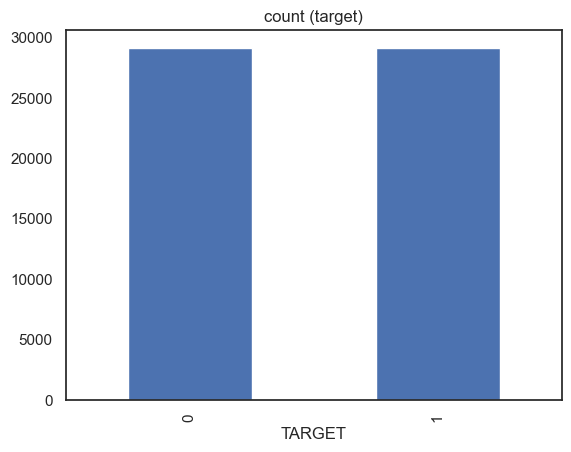

In [141]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['TARGET'].value_counts())# plot the count after under-sampeling
test_under['TARGET'].value_counts().plot(kind='bar', title='count (target)')

In [162]:
test_under
target_under = test_under['TARGET']
train_under = test_under.drop(columns=['TARGET'])

In [163]:
SEED=301
np.random.seed(SEED)
cv = KFold(n_splits=5, shuffle=True)
scoring_list = ['accuracy', 'roc_auc'] #, 'f1', 'precision', 'recall'
model = LogisticRegression()
results = cross_validate(model, train_under, target_under, cv=cv, scoring = scoring_list, return_train_score=False)
print_results(results, scoring_list)

c:\Users\macvi\anaconda3\envs\class\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



c:\Users\macvi\anaconda3\envs\class\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\macvi\anaconda3\envs\class\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\macvi\anaco

FIT_TIME
Average: 84.23
Interval: 67.06, 101.40
SCORE_TIME
Average: 2.06
Interval: 1.27, 2.85
TEST_ACCURACY
Average: 57.10
Interval: 56.93, 57.27
TEST_ROC_AUC
Average: 59.55
Interval: 58.94, 60.16


c:\Users\macvi\anaconda3\envs\class\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#### Over-sampling

# Análise financeira

# Escoragem da base Out-of-time